In [469]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [480]:
def prepare_data(path, groupby):
    df = pd.read_csv(path)
    df["width"] = df["width"].astype(int)
    df["height"] = df["height"].astype(int)
    df = df.groupby(groupby).mean().reset_index()
    df["size"] = df["width"].astype(str) + "x" + df["height"].astype(str)
    return df


def calc_stats(df, serial, threads_=False):
    colors = df["k"].unique()
    size = df["size"].unique()
    if threads_:
        threads = df["t"].unique()
        for s in size:
            for t in threads:
                for k in colors:
                    ts = serial.loc[(serial["k"] == k) & (serial["size"] == s), "time"].values
                    tp = df.loc[(df["t"] == t) & (df["k"] == k) & (df["size"] == s), "time"].values
                    S = ts / tp
                    E = S / t
                    df.loc[(df["t"] == t) & (df["k"] == k) & (df["size"] == s), "s"] = S
                    df.loc[(df["t"] == t) & (df["k"] == k) & (df["size"] == s), "e"] = E
    else:
        for s in size:
            for k in colors:
                ts = serial.loc[(serial["k"] == k) & (serial["size"] == s), "time"].values
                tp = df.loc[(df["k"] == k) & (df["size"] == s), "time"].values

                df.loc[(df["k"] == k) & (df["size"] == s), "s"] = ts / tp
    return df


In [481]:
cpu = prepare_data("./cpu_local.csv", ["k", "n", "width", "height"])
cpup = prepare_data("./cpup_local.csv", ["k", "n", "t", "width", "height"])
gpu = prepare_data("./gpu_local.csv", ["k", "n", "width", "height"])

k = [16, 32, 64, 128, 256]
threads = [2, 4, 6, 8, 12]

In [482]:
cpu = prepare_data("./cpu.csv", ["k", "n", "width", "height"])
cpup = prepare_data("./cpup.csv", ["k", "n", "t", "width", "height"])
gpu = prepare_data("./gpu.csv", ["k", "n", "width", "height"])

cpup = calc_stats(cpup, cpu, True)
gpu = calc_stats(gpu, cpu)

k = [16, 32, 64, 128, 256]
threads = [2, 4, 8, 16, 32, 64]


Text(0.5, 0.93, 'Čas izvajanja paralelnega algoritma na CPE')

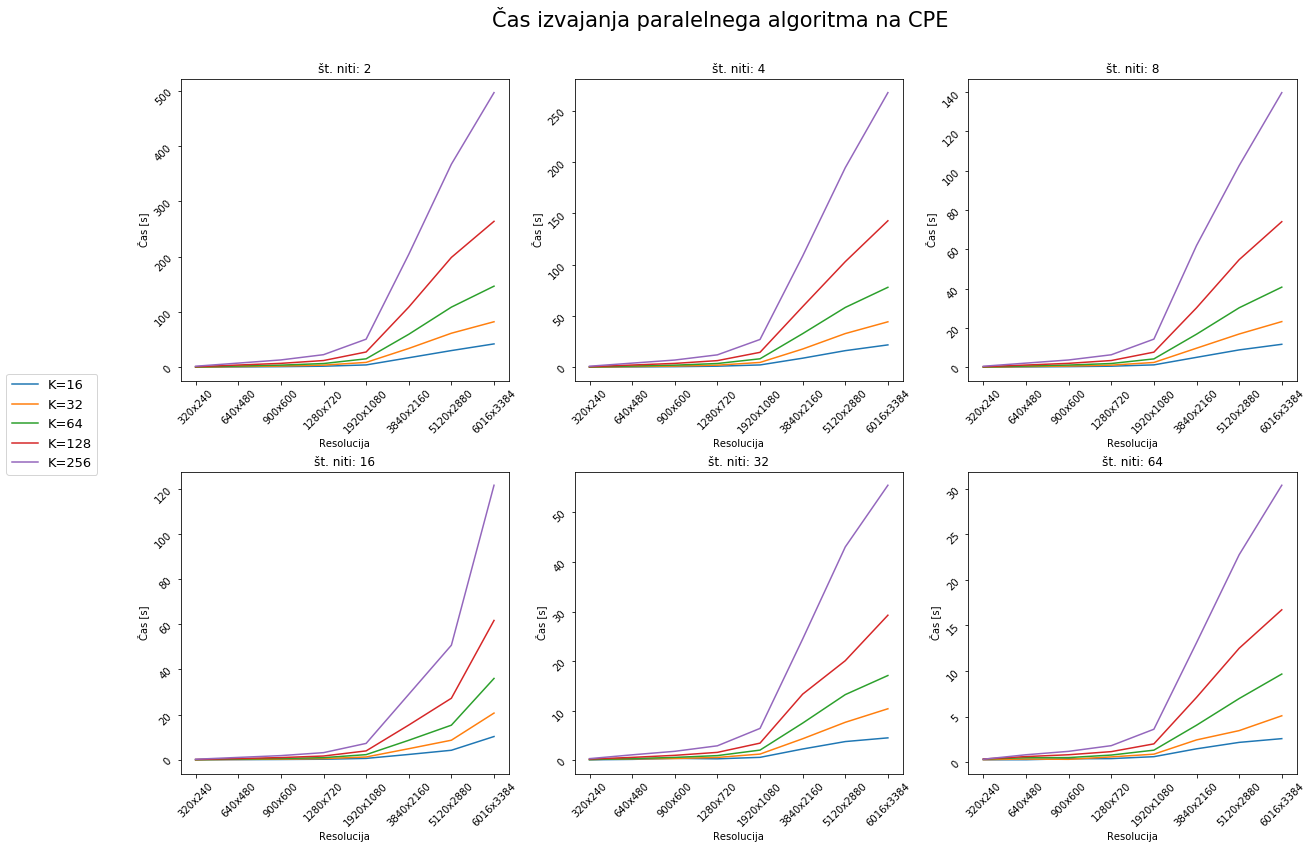

In [483]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.3)

for i, t in enumerate(threads, 1):
    ax = fig.add_subplot(3, 3, i)
    for e in k:
        x = cpup[(cpup["k"] == e) & (cpup["t"] == t)]["size"]
        ax.plot(
            x,
            cpup[(cpup["k"] == e) & (cpup["t"] == t)]["time"],
            label=f"K={e}",
        )
    ax.tick_params(labelrotation=45)
    ax.set_xlabel("Resolucija")
    ax.set_ylabel("Čas [s]")
    ax.set_title(f"št. niti: {t}")
    _, labels = ax.get_legend_handles_labels()
fig.legend(labels, loc="center left", ncol=1, prop={"size": 13})
fig.suptitle("Čas izvajanja paralelnega algoritma na CPE", y=0.93, size=21)



Text(0.5, 0.93, 'Pohitritev paralelnega algoritma na CPE v primerjavi z serijskim')

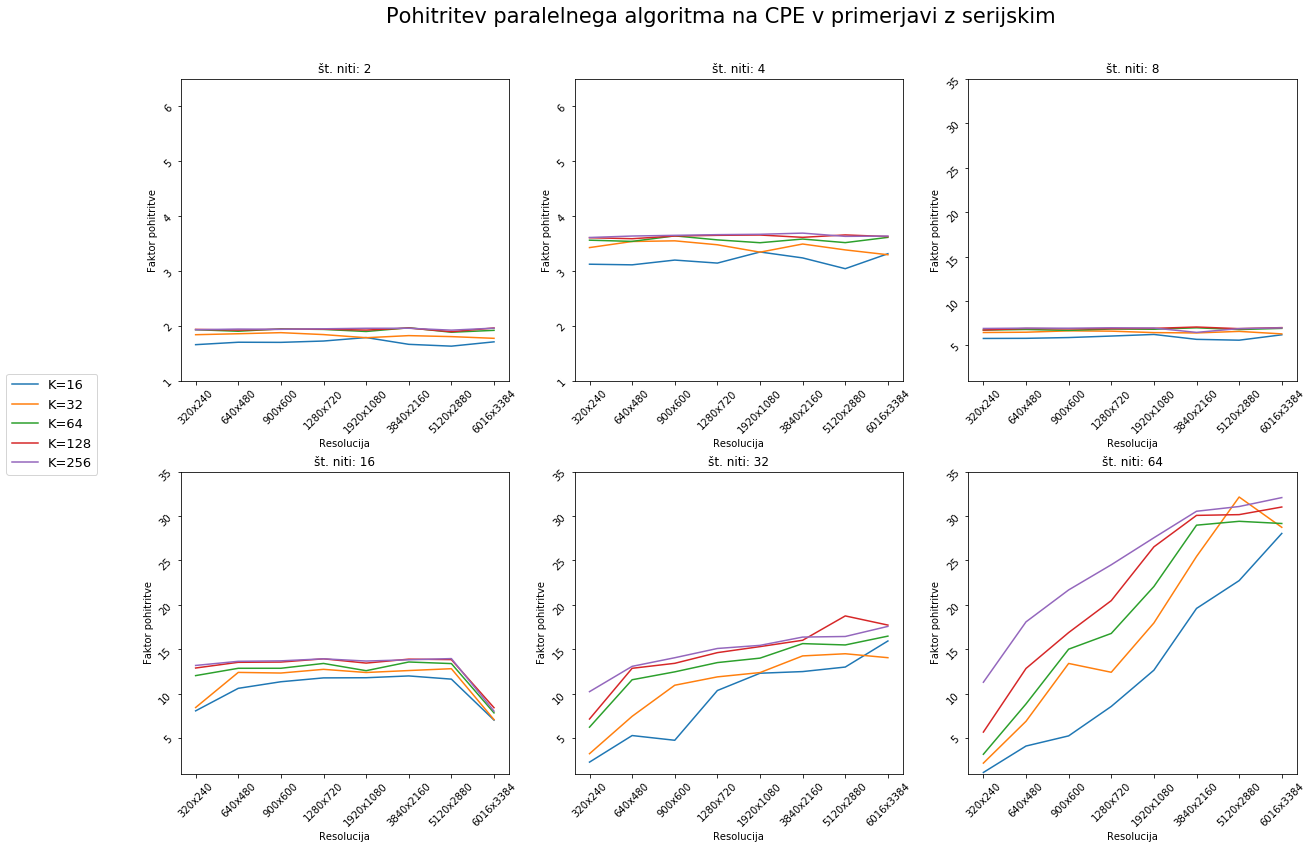

In [484]:
x = cpup[(cpup["k"] == 16) & (cpup["t"] == 2)]["size"]
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.3)
fig.tight_layout()

for i, t in enumerate(threads, 1):
    ax = fig.add_subplot(3, 3, i)
    for e in k:
        ax.plot(
            x,
            cpup[(cpup["k"] == e) & (cpup["t"] == t)]["s"],
            label=f"K={e}",
        )
    ax.tick_params(labelrotation=45)
    ax.set_xlabel("Resolucija")
    ax.set_ylabel("Faktor pohitritve")
    ax.set_title(f"št. niti: {t}")

    if i<3:
        ax.set_ylim([1, 6.5])
    else:
        ax.set_ylim([1, 35])

    
    _, labels = ax.get_legend_handles_labels()
fig.legend(labels, loc="center left", ncol=1, prop={"size": 13})
fig.suptitle("Pohitritev paralelnega algoritma na CPE v primerjavi z serijskim", y=0.93, size=21)


Text(0.5, 0.93, 'Učinkovitost paralelizacije algoritma na CPE')

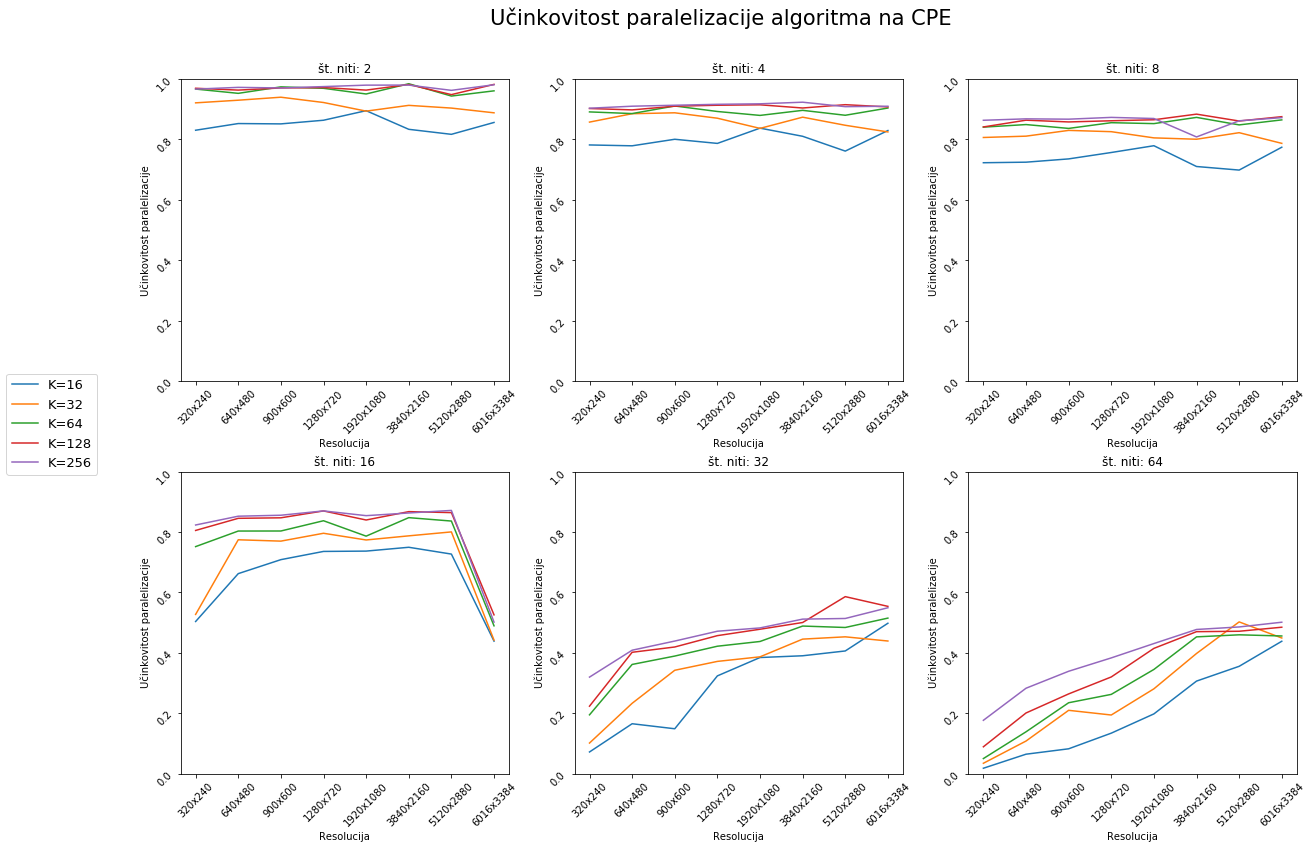

In [485]:
x = cpup[(cpup["k"] == 16) & (cpup["t"] == 2)]["size"]
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.3)

for i, t in enumerate(threads, 1):
    ax = fig.add_subplot(3, 3, i)
    for e in k:
        ax.plot(
            x,
            cpup[(cpup["k"] == e) & (cpup["t"] == t)]["e"],
            label=f"K={e}",
        )
    ax.tick_params(labelrotation=45)
    ax.set_xlabel("Resolucija")
    ax.set_ylabel("Učinkovitost paralelizacije")
    ax.set_title(f"št. niti: {t}")
    ax.set_ylim([0,1])
    _, labels = ax.get_legend_handles_labels()
fig.legend(labels, loc="center left", ncol=1, prop={"size": 13})
fig.suptitle("Učinkovitost paralelizacije algoritma na CPE", y=0.93, size=21)


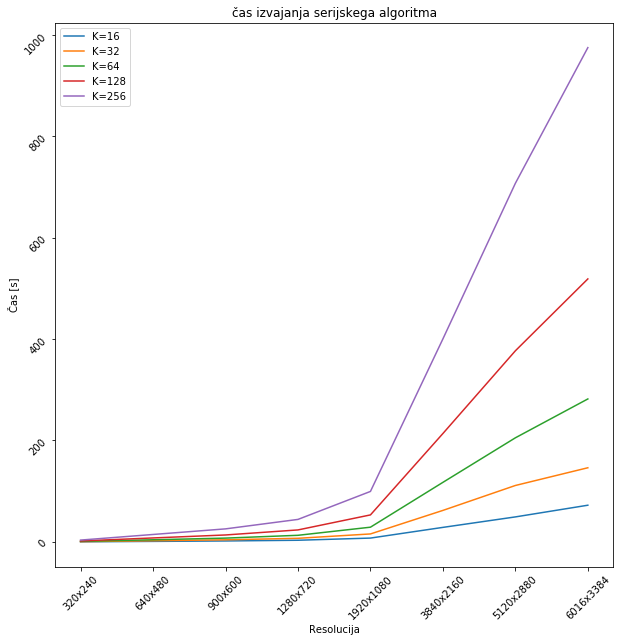

In [486]:
x = cpu[cpu["k"] == 16]["size"]
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1,1,1)
for e in k:
    ax.plot(
        x,
        cpu[cpu["k"] == e]["time"],
        label=f"K={e}",
    )
ax.tick_params(labelrotation=45)
ax.set_xlabel("Resolucija")
ax.set_ylabel("Čas [s]")
ax.set_title("čas izvajanja serijskega algoritma")
ax.legend()


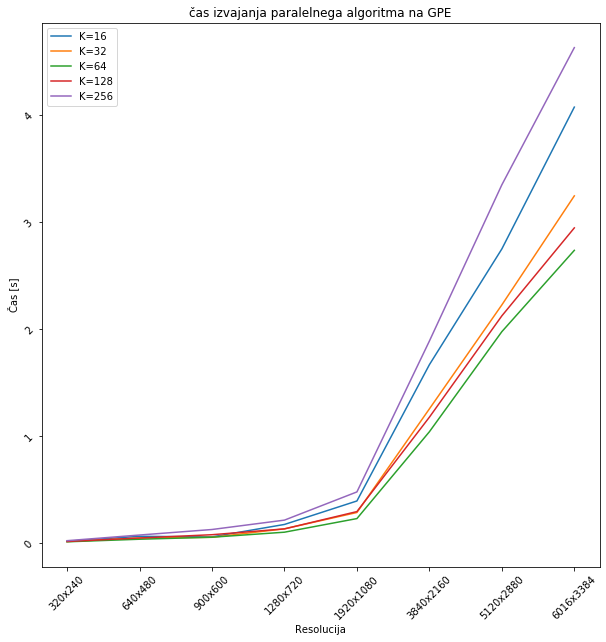

In [487]:
x = gpu[gpu["k"] == 32]["size"]
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)
for e in k:
    ax.plot(
        x,
        gpu[gpu["k"] == e]["time"],
        label=f"K={e}",
    )
ax.tick_params(labelrotation=45)
ax.set_xlabel("Resolucija")
ax.set_ylabel("Čas [s]")
ax.set_title("čas izvajanja paralelnega algoritma na GPE")
ax.legend()


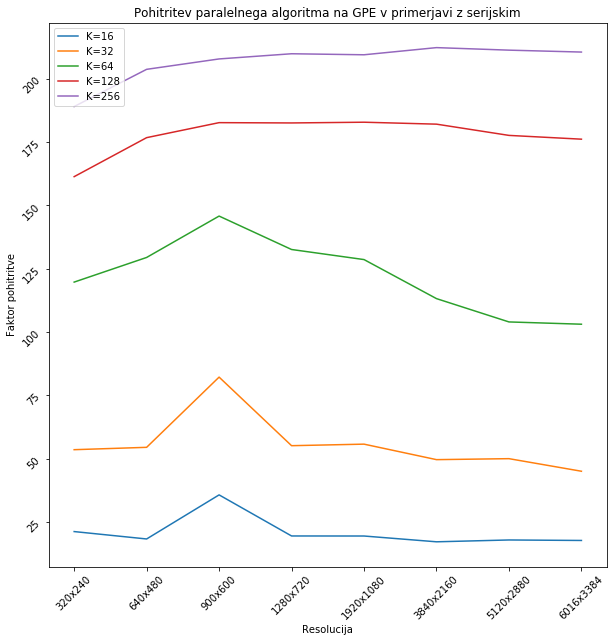

In [488]:
x = gpu[gpu["k"] == 16]["size"]
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)
for e in k:
    ax.plot(
        x,
        gpu[gpu["k"] == e]["s"],
        label=f"K={e}",
    )
ax.tick_params(labelrotation=45)
ax.set_xlabel("Resolucija")
ax.set_ylabel("Faktor pohitritve")
ax.set_title("Pohitritev paralelnega algoritma na GPE v primerjavi z serijskim")
ax.legend()

Text(0.5, 0.93, 'Primerjava časa izvajanja algoritmov glede na število gruč')

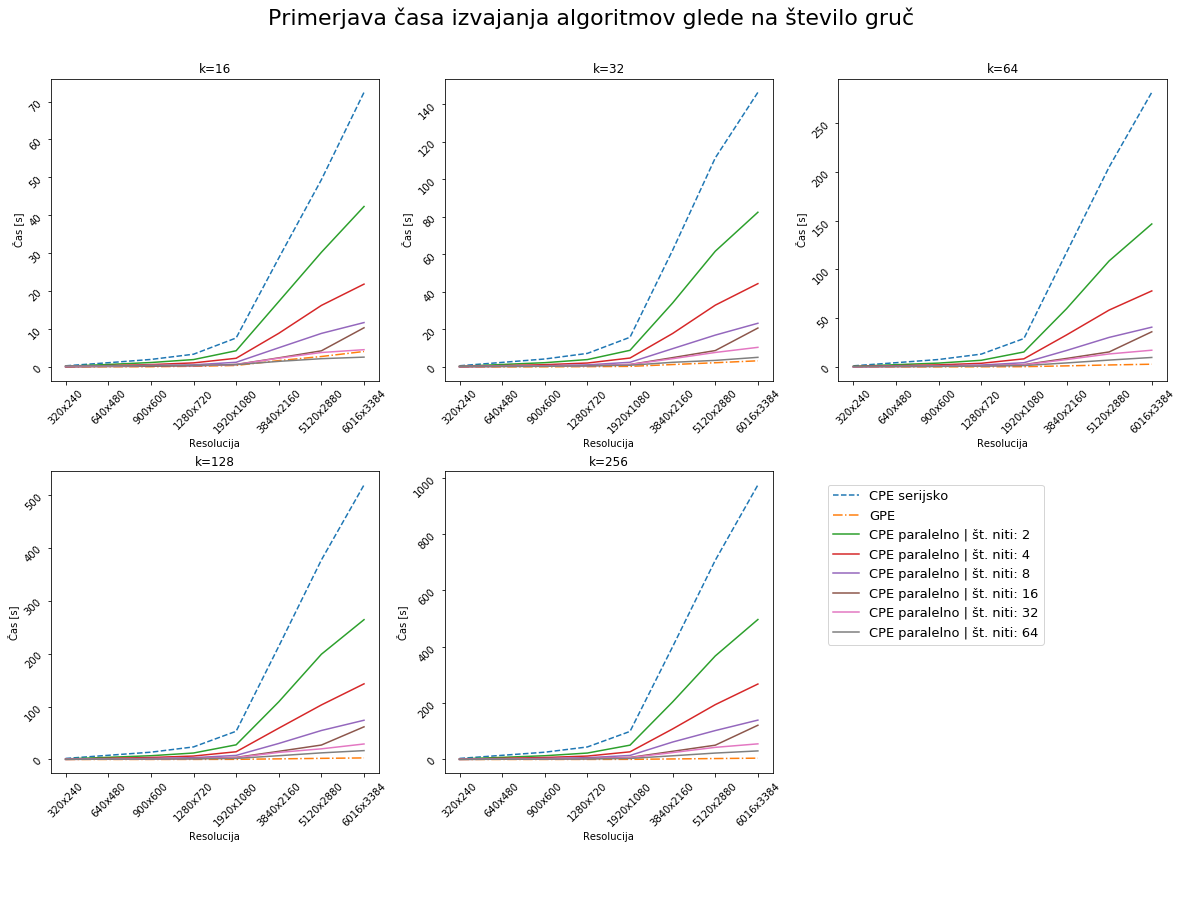

In [491]:
x = cpup[(cpup["k"] == 16) & (cpup["t"] == 2)]["size"]
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.3)

for i, e in enumerate(k, 1):
    ax = fig.add_subplot(3, 3, i)
    ax.plot(x, cpu[cpu["k"] == e]["time"], "--", label=f"CPE serijsko")
    ax.plot(x, gpu[gpu["k"] == e]["time"], "-.", label=f"GPE")
    for t in threads:
        ax.plot(
            x,
            cpup[(cpup["k"] == e) & (cpup["t"] == t)]["time"],
            label=f"CPE paralelno | št. niti: {t}",
        )
        ax.tick_params(labelrotation=45)
        ax.set_xlabel("Resolucija")
        ax.set_ylabel("Čas [s]")
        ax.set_title(f"k={e}")
        _, labels = ax.get_legend_handles_labels()
fig.legend(labels, loc=(0.7, 0.3), ncol=1, prop={"size": 13})
fig.suptitle("Primerjava časa izvajanja algoritmov glede na število gruč", y=0.93, size=22)


In [501]:
print(cpu.drop(columns=["size"]).to_latex(index=False, column_format="r|r|r|r|r"))

\begin{tabular}{r|r|r|r|r}
\toprule
  k &  n &  width &  height &       time \\
\midrule
 16 & 50 &    320 &     240 &   0.294847 \\
 16 & 50 &    640 &     480 &   1.108794 \\
 16 & 50 &    900 &     600 &   1.973933 \\
 16 & 50 &   1280 &     720 &   3.349446 \\
 16 & 50 &   1920 &    1080 &   7.634581 \\
 16 & 50 &   3840 &    2160 &  28.719472 \\
 16 & 50 &   5120 &    2880 &  49.373230 \\
 16 & 50 &   6016 &    3384 &  72.419973 \\
 32 & 50 &    320 &     240 &   0.603921 \\
 32 & 50 &    640 &     480 &   2.397267 \\
 32 & 50 &    900 &     600 &   4.208989 \\
 32 & 50 &   1280 &     720 &   7.191427 \\
 32 & 50 &   1920 &    1080 &  15.787287 \\
 32 & 50 &   3840 &    2160 &  62.176949 \\
 32 & 50 &   5120 &    2880 & 111.323453 \\
 32 & 50 &   6016 &    3384 & 146.253363 \\
 64 & 50 &    320 &     240 &   1.088703 \\
 64 & 50 &    640 &     480 &   4.300878 \\
 64 & 50 &    900 &     600 &   7.574608 \\
 64 & 50 &   1280 &     720 &  13.112517 \\
 64 & 50 &   1920 &    1080 &  

In [502]:
print(
    cpup[cpup["size"].isin(["6016x3384"])]
    .drop(columns=["size", "s", "e"])
    .to_latex(index=False, column_format="r|r|r|r|r|r")
)


\begin{tabular}{r|r|r|r|r|r}
\toprule
  k &  n &  t &  width &  height &       time \\
\midrule
 16 & 50 &  2 &   6016 &    3384 &  42.311170 \\
 16 & 50 &  4 &   6016 &    3384 &  21.837430 \\
 16 & 50 &  8 &   6016 &    3384 &  11.698559 \\
 16 & 50 & 16 &   6016 &    3384 &  10.325713 \\
 16 & 50 & 32 &   6016 &    3384 &   4.548478 \\
 16 & 50 & 64 &   6016 &    3384 &   2.583756 \\
 32 & 50 &  2 &   6016 &    3384 &  82.374052 \\
 32 & 50 &  4 &   6016 &    3384 &  44.349629 \\
 32 & 50 &  8 &   6016 &    3384 &  23.240360 \\
 32 & 50 & 16 &   6016 &    3384 &  20.699447 \\
 32 & 50 & 32 &   6016 &    3384 &  10.417131 \\
 32 & 50 & 64 &   6016 &    3384 &   5.092522 \\
 64 & 50 &  2 &   6016 &    3384 & 146.743476 \\
 64 & 50 &  4 &   6016 &    3384 &  77.993739 \\
 64 & 50 &  8 &   6016 &    3384 &  40.768459 \\
 64 & 50 & 16 &   6016 &    3384 &  36.027144 \\
 64 & 50 & 32 &   6016 &    3384 &  17.118555 \\
 64 & 50 & 64 &   6016 &    3384 &   9.671210 \\
128 & 50 &  2 &   6016

In [503]:
print(gpu.drop(columns=["size", "s"]).to_latex(index=False, column_format="r|r|r|r|r"))

\begin{tabular}{r|r|r|r|r}
\toprule
  k &  n &  width &  height &     time \\
\midrule
 16 & 50 &    320 &     240 & 0.013855 \\
 16 & 50 &    640 &     480 & 0.060379 \\
 16 & 50 &    900 &     600 & 0.055207 \\
 16 & 50 &   1280 &     720 & 0.171353 \\
 16 & 50 &   1920 &    1080 & 0.390951 \\
 16 & 50 &   3840 &    2160 & 1.665356 \\
 16 & 50 &   5120 &    2880 & 2.748004 \\
 16 & 50 &   6016 &    3384 & 4.074156 \\
 32 & 50 &    320 &     240 & 0.011271 \\
 32 & 50 &    640 &     480 & 0.043974 \\
 32 & 50 &    900 &     600 & 0.051195 \\
 32 & 50 &   1280 &     720 & 0.130372 \\
 32 & 50 &   1920 &    1080 & 0.283080 \\
 32 & 50 &   3840 &    2160 & 1.252147 \\
 32 & 50 &   5120 &    2880 & 2.224572 \\
 32 & 50 &   6016 &    3384 & 3.244167 \\
 64 & 50 &    320 &     240 & 0.009095 \\
 64 & 50 &    640 &     480 & 0.033233 \\
 64 & 50 &    900 &     600 & 0.051973 \\
 64 & 50 &   1280 &     720 & 0.098921 \\
 64 & 50 &   1920 &    1080 & 0.226281 \\
 64 & 50 &   3840 &    2160 & 1

Text(0.5, 0.93, 'Primerjava časa izvajanja glede na število niti')

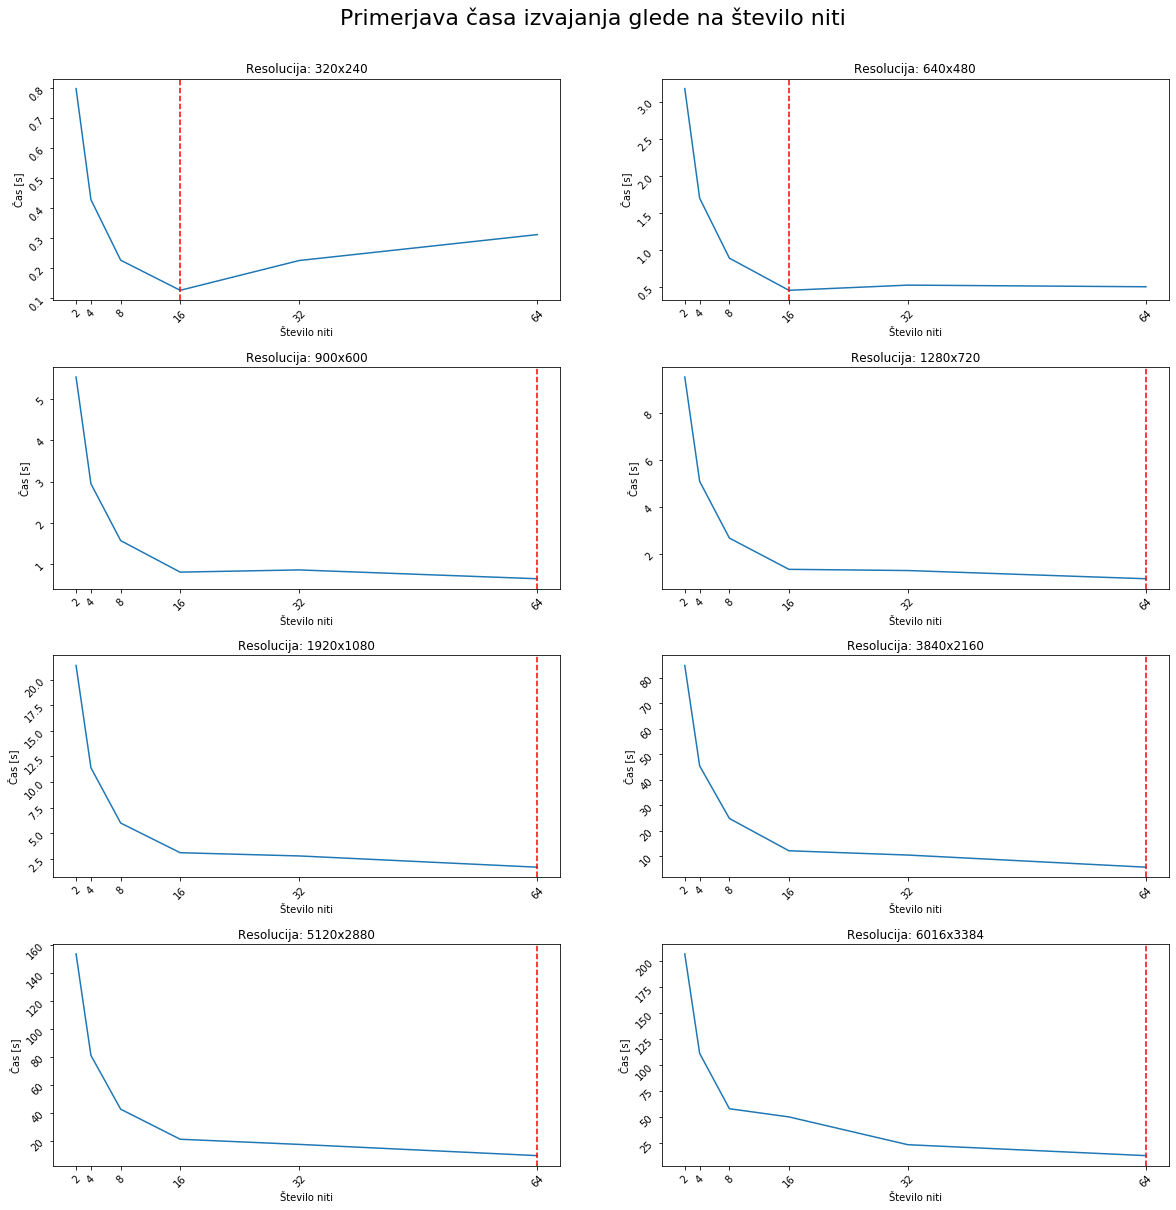

In [495]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.3)

resolutions = cpup["size"].unique()

for i, res in enumerate(resolutions, 1):
    x = cpup[(cpup["k"] == e) & (cpup["size"] == res)]["t"].to_numpy()
    ax = fig.add_subplot(4, 2, i)
    ax.plot(
        x,
        cpup[(cpup["size"] == res)].groupby("t")["time"].mean(),
        label=f"CPE paralelno | št. niti: {t}",
    )

    mx = np.argmin(cpup[(cpup["size"] == res)].groupby("t")["time"].mean())

    ax.axvline(x[mx], linestyle="--", c="r")   
    ax.set_xticks(x)

    ax.tick_params(labelrotation=45)
    ax.set_xlabel("Število niti")
    ax.set_ylabel("Čas [s]")
    ax.set_title(f"Resolucija: {res}")
fig.suptitle("Primerjava časa izvajanja glede na število niti", y=0.93, size=22)


In [500]:
((cpup["time"].sum() + cpu["time"].sum() + gpu["time"].sum()) / 3600) * 2


5.550234752222223